In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import random
import calendar

from tqdm import tqdm #show a progress meter in the loop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed.csv"

df_proceeded = pd.read_csv(path)

In [ ]:
df_proceeded

In [ ]:
#df_proceeded = df_proceeded.sort_values(by=['Time'])

Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed102.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed102.csv"
df_proceeded102 = pd.read_csv(path)
#df_proceeded102 = df_proceeded102.sort_values(by=['Time'])

Journey 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed201.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed201.csv"
df_proceeded201 = pd.read_csv(path)
#df_proceeded201 = df_proceeded201.sort_values(by=['Time'])

Journey 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed202.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed202.csv"
df_proceeded202 = pd.read_csv(path)
#df_proceeded202 = df_proceeded202.sort_values(by=['Time'])

## **Preprocessing**

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [ ]:
data = df_proceeded[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data

In [ ]:
data.loc[data.Precipitation == -499 ]=0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
data.loc[data.Precipitation == -499 ]

,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
#data = data.loc[data['dayofweek'].isin([0])]

In [ ]:
data = data.loc[data['Node A to Node B'].isin(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp'])]
df_proceeded = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data.dtypes

Node A to Node B    category
Precipitation       category
dayofweek           category
timeofday           category
Driving_time_s       float64
dtype: object

## One-hot encoding

One-hot encode the categorical feautures.



In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One-hot encoding the categories
data.head()

In [ ]:
data.describe

In [ ]:
data101 = data.copy()
data101

## Preprocessing with other journeys (routes)

Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [ ]:
data = df_proceeded102[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded102['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['U Straßburger Straße|Wandsbeker Allee',
'AK Barmbek|Hartzloh',
'U Habichtstraße|Habichtstraße (Mitte)',
'Habichtsplatz|U Habichtstraße',
'U Alter Teichweg|U Straßburger Straße',
'Wandsbeker Allee|U Wandsbek Markt',
'Hartzloh|Habichtsplatz',
'S Rübenkamp|AK Barmbek',
'Habichtstraße (Mitte)|U Alter Teichweg'])]
df_proceeded102 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data[:50]

In [ ]:
data102 = data.copy()
data102

Journey 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [ ]:
data = df_proceeded201[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded201['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['Kapstadtring|Manilabrücke',
'U Alsterdorf|Hindenburgstraße',
'Habichtstraße (Mitte)|U Habichtstraße',
'Neue Wöhr|Hartzloh',
'Hartzloh|AK Barmbek',
'Brabandstraße|Moltrechtweg',
'Alsterkrugchaussee (Mitte)|Obenhauptstraße',
'Manilabrücke|Sydneystraße',
'Hebebrandstraße|S Rübenkamp',
'U Habichtstraße|Habichtsplatz',
'Moltrechtweg|Alsterkrugchaussee (Mitte)',
'Hindenburgstraße|Brabandstraße',
'S Rübenkamp|Kapstadtring',
'Wandsbeker Allee|U Straßburger Straße',
'Sydneystraße|U Alsterdorf',
'Habichtsplatz|Neue Wöhr',
'AK Barmbek|Hebebrandstraße',
'U Straßburger Straße|U Alter Teichweg',
'Obenhauptstraße|Lufthansa-Basis (Haupteingang)',
'U Alter Teichweg|Habichtstraße (Mitte)',
'U Wandsbek Markt|Wandsbeker Allee',
])]
df_proceeded201 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One-hot encoding the categories
data[:50]

In [ ]:
data201 = data.copy()
data201

Journey 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [ ]:
data = df_proceeded202[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded202['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'])]
df_proceeded202 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data[:50]

In [ ]:
data202 = data.copy()
data202

# Select route to implement

In [ ]:
#select the route one by one
route = 101
month = 11

if route == 101:
  #route 101
  data = data101.copy()
  df_proceeded_node = df_proceeded['Node A to Node B']
  path_end = "data101"
  path_name = "Journey pattern 101 with 12 stops" #"Route 101 U Wandsbek Markt to S Rübenkamp"
  route_unique = (df_proceeded_node.unique())

elif route == 102:
  #route 102
  data = data102.copy()
  df_proceeded_node = df_proceeded102['Node A to Node B']
  path_end = "data102"
  path_name = "Journey pattern 102 with 10 stops"#"Route 102 S Rübenkamp to U Wandsbek Markt"
  route_unique = (df_proceeded_node.unique())

elif route == 201:
  #route 201
  data = data201.copy()
  df_proceeded_node = df_proceeded201['Node A to Node B']
  path_end = "data201"
  path_name = "Journey pattern 201 with 22 stops"#"Route 201 U Wandsbek Markt to Lufthansa-Basis (Haupteingang)"
  route_unique = (df_proceeded_node.unique())

elif route ==202:
  #route 202
  data = data202.copy()
  df_proceeded_node = df_proceeded202['Node A to Node B']
  path_end = "data202"
  path_name = "Journey pattern 202 with 20 stops"#"Route 202 Lufthansa-Basis (Haupteingang) to U Wandsbek Markt"
  route_unique = np.array(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'], dtype= object)


In [ ]:
data = data.loc[pd.to_datetime(data.index).month == month]

In [ ]:
#Import data to collect results and compare
#for 101,201
#comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+".csv")
#comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+".csv")
#for others
comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")
#comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/01_12combine_result_"+path_end+".csv")
#comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/01_12combine_result_rmse_"+path_end+".csv"

# Kalman filter
Fine-tune the estimation travel time from MLP with the most recent bus arrival time information

**Run Kalman filter by tour**

In the following are based on Chen et al. (2004).
Consider the following state space model:

 $X_{k+1} =
 \begin{pmatrix}
  1 & 0 \\
  0 & 1 
 \end{pmatrix}
 X_k+u_k+w_k$

 $z_k = HX_k + v_k$

The filtering procedure is outlined as follows.





1.   set $\hat X^-_0 = \begin{pmatrix}
  \hat t_0 \\ \hat s_0 
 \end{pmatrix}  =  \begin{pmatrix}
  \hat t_0 \\ 0 
 \end{pmatrix} $ 
 ; $t_0$ is the total travel time predicted from MLP of that trip. $s_0$ is the travel time predicted from MLP from the origin to the time point $k$ therefore $s_0$ is zero.
2.   set covariance matrix $p_0 = \begin{pmatrix}
  1 & 0 \\
  0 & 1 
 \end{pmatrix} $

3. predict State variable $ \hat X^-_k = F \hat X_{k-1} + T_{k-1, k} \begin{pmatrix}
  -1 \\ 1
 \end{pmatrix}
 = \begin{pmatrix}
  1 & 0 \\ 0 & 1
 \end{pmatrix}
  \hat X_{k-1} + T_{k-1, k} \begin{pmatrix}
  -1 \\ 1
 \end{pmatrix}$
 ; $T_{k-1, k}$ is the travel time predicted from MLP from node $k-1$ to $k$

4. calculate Covariance $P^-_k = F P_{k-1} F^T + Q_{k-1}$ where $Q_{k-1}$ is the process noise.

5. calculate Kalman gain $K_k = P^-_kH (HP^-_kH^T + R)^{-1}$ where $ H = \begin{pmatrix}
  0 & 1
 \end{pmatrix} $ and $R$ is the measure noise

6. update State variable $\hat X_k = \hat X^-_k  +K_k(z_k - H \hat X^-_k) $ ; $z_k$ is the actual driving time from the original $k = 0$ to time point $k$

7. if $k$ is the destination time point, finish the process. Otherwise continue.

8. update Covariance $P_k = P^-_k - K_k H P^-_k$

9. repeat from 3.




## Preparing data

In [ ]:
comb_result

In [ ]:
comb_result= comb_result.drop(['Unnamed: 0'], axis=1) #, 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'LSTMGA_Kalman',	'LSTMGA_Kalman_trip_cum',	'MLPGA_Kalman',	'MLPGA_Kalman_trip_cum'
#comb_result = comb_result.rename(columns= {'Unnamed: 0.1':'index'})
comb_kf = comb_result.copy()
comb_kf

In [ ]:
#comb_kf = comb_kf.loc[comb_kf['index']>=22].reset_index(drop = True)

## **LSTMGA Kalman**

### Implement Kalman filter

In [ ]:
!pip install filterpy==1.1.0
#from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
dt = 0.
R_var = 1. #measure noise variance
Q_var = 1. #process noise variance
#x = np.array([[0, 0]]).T #initial of x^_0 = (t[0], s[0]).T
#P = np.diag([1, 1]) #initial covariance
F = np.array([[1, dt], #transformation matrix
              [0,  1]])
H = np.array([[0., 1.]]) #measurement function
R = np.array([[R_var]]) #measure noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var) #process noise
u = np.array([[-1, 1]]).T #the control input for B (T_{k-1, k})

In [ ]:
route_unique[-1]

'Wandsbeker Allee|U Wandsbek Markt'

In [ ]:
comb_kf.columns[-3]

'LSTMGA_2H_32_trip_cum'

In [ ]:
comb_kf.loc[comb_kf['Path']== route_unique[-1]]

In [ ]:
end_trip_pred = [] #list of travel time on the end trip 
for i in range(len(comb_kf['Path'])):
  if (i != 0) and (comb_kf['Path'][i] == route_unique[0]):
    end_trip_pred.append(comb_kf[comb_kf.columns[-3]][(i-1)])
  elif i == len(comb_kf['Path'])-1:
    end_trip_pred.append(comb_kf[comb_kf.columns[-3]][(i)])
end_trip_pred

In [ ]:
len(end_trip_pred)

74

In [ ]:
comb_kf['Path'][0:10] == route_unique[0]

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Path, dtype: bool

In [ ]:
from numpy import dot
from scipy.linalg import inv


xs, cov = [], [] #, hh
pos = 0
for z in range(len(comb_kf['Actual_trip_cum'])):
    if (comb_kf['Path'][z] == route_unique[0]) or (z == 0):
      x = np.array([[end_trip_pred[pos], 0]]).T #initial of x^_0 = (t[0], s[0]).T
      pos +=1
      P = np.diag([1, 1]) #initial covariance
      #print(pos, x)
    B = comb_kf[comb_kf.columns[-4]][z] #comb_kf.columns[-6], comb_kf.columns[-4]
    # predict
    x = dot(F, x) + dot(B, u)
    xs.append(x.flatten()) #append after predict
    #hh.append(H)
    P = dot(F, P).dot(F.T) + Q
    
    #update
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(inv(S))
    y = comb_kf['Actual_trip_cum'][z] - dot(H, x)
    x += dot(K, y)
    P = P - dot(K, H).dot(P)
    
    #xs.append(x.flatten())
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

### Show results

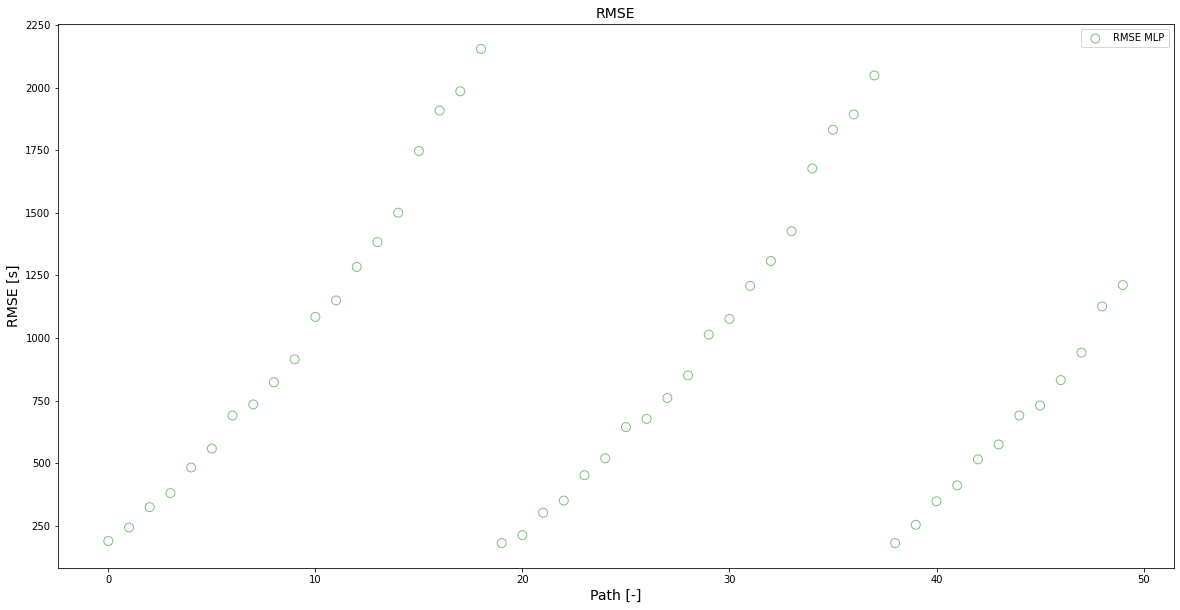

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_trip'],label = "RMSE MLP",linestyle='--',color='b',alpha=0.5)
plt.scatter(x=comb_result.index[:50],y=xs[:,1][:50],label = 'RMSE MLP',s=80, facecolors='none', edgecolors='g',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],label = "RMSE MLP_Kalman",linestyle='-',color='r',alpha=0.5)

plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Path [-]', fontsize=14)

plt.title('RMSE', fontsize = 14)

plt.legend()

### Arrange results table

In [ ]:
xs_sep = []
a = 0
for i in range(len(comb_kf['Path'])):
    if comb_kf['Path'][i] == route_unique[0]:
      a = xs[:, 1][i]
      xs_sep.append(a)
      #print(a)
    else:
      a = xs[:, 1][i] - a
      xs_sep.append(a)
      #print('xxx',a)
      a = xs[:, 1][i]

xs_sep

In [ ]:
comb_kf['LSTMGA_Kalman'] = xs_sep
comb_kf['LSTMGA_Kalman_trip_cum'] = xs[:,1]
comb_kf

## **MLPGA Kalman**

### Implement Kalman filter

In [ ]:
dt = 0.
R_var = 1. #measure noise variance
Q_var = 1. #process noise variance
#x = np.array([[0, 0]]).T #initial of x^_0 = (t[0], s[0]).T
#P = np.diag([1, 1]) #initial covariance
F = np.array([[1, dt], #transformation matrix
              [0,  1]])
H = np.array([[0., 1.]]) #measurement function
R = np.array([[R_var]]) #measure noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var) #process noise
u = np.array([[-1, 1]]).T #the control input, so $\mathbf{Bu}$ computes the contribution of the controls to the state after the transition

In [ ]:
comb_kf.columns[-3]

'MLPGA_3H_16_trip_cum'

In [ ]:
end_trip_pred = []
for i in range(len(comb_kf['Path'])):
  if (i != 0) and (comb_kf['Path'][i] == route_unique[0]):
    end_trip_pred.append(comb_kf[comb_kf.columns[-3]][(i-1)])
  elif i == len(comb_kf['Path'])-1:
    end_trip_pred.append(comb_kf[comb_kf.columns[-3]][(i)])
end_trip_pred

In [ ]:
xs, cov = [], []
pos = 0
for z in range(len(comb_kf['Actual_trip_cum'])):
    if (comb_kf['Path'][z] == route_unique[0]) or (z==0):
      x = np.array([[end_trip_pred[pos], 0]]).T #initial of x^_0 = (t[0], s[0]).T
      pos +=1
      P = np.diag([1, 1]) #initial covariance
      #print(pos, x)
    B = comb_kf[comb_kf.columns[-4]][z]
    # predict
    x = dot(F, x) + dot(B, u)
    xs.append(x.flatten())
    P = dot(F, P).dot(F.T) + Q
    
    #update
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(inv(S))
    y = comb_kf['Actual_trip_cum'][z] - dot(H, x)
    x += dot(K, y)
    P = P - dot(K, H).dot(P)
    
    #xs.append(x.flatten())
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

### Show results

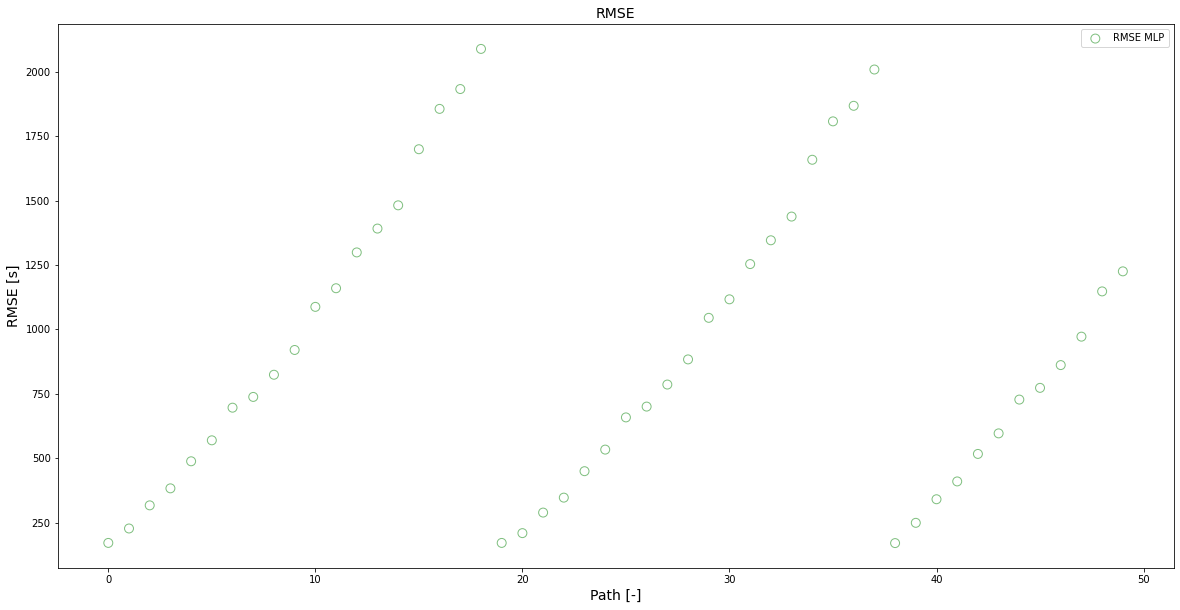

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_trip'],label = "RMSE MLP",linestyle='--',color='b',alpha=0.5)
plt.scatter(x=comb_result.index[:50],y=xs[:,1][:50],label = 'RMSE MLP',s=80, facecolors='none', edgecolors='g',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],label = "RMSE MLP_Kalman",linestyle='-',color='r',alpha=0.5)

plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Path [-]', fontsize=14)

plt.title('RMSE', fontsize = 14)

plt.legend()

### Arrange results table

In [ ]:
xs_sep = []
a = 0
for i in range(len(comb_kf['Path'])):
    if comb_kf['Path'][i] == route_unique[0]:
      a = xs[:, 1][i]
      xs_sep.append(a)
      #print(a)
    else:
      a = xs[:, 1][i] - a
      xs_sep.append(a)
      #print('xxx',a)
      a = xs[:, 1][i]

xs_sep

In [ ]:
comb_kf['MLPGA_Kalman'] = xs_sep
comb_kf['MLPGA_Kalman_trip_cum'] = xs[:,1]
comb_kf

## **MLP Kalman**

### Implement Kalman filter

In [ ]:
dt = 0.
R_var = 1. #measure noise variance
Q_var = 1. #process noise variance
#x = np.array([[0, 0]]).T #initial of x^_0 = (t[0], s[0]).T
#P = np.diag([1, 1]) #initial covariance
F = np.array([[1, dt], #transformation matrix
              [0,  1]])
H = np.array([[0., 1.]]) #measurement function
R = np.array([[R_var]]) #measure noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var) #process noise
u = np.array([[-1, 1]]).T #the control input, so $\mathbf{Bu}$ computes the contribution of the controls to the state after the transition

In [ ]:
comb_kf['MLP_trip_cum']

0        124
1        248
2        373
3        496
4        619
        ... 
1398    1876
1399    2002
1400    2126
1401    2251
1402    2376
Name: MLP_trip_cum, Length: 1403, dtype: int64

In [ ]:
end_trip_pred = []
for i in range(len(comb_kf['Path'])):
  if (i != 0) and (comb_kf['Path'][i] == route_unique[0]):
    end_trip_pred.append(comb_kf['MLP_trip_cum'][(i-1)])
  elif i == len(comb_kf['Path'])-1:
    end_trip_pred.append(comb_kf['MLP_trip_cum'][(i)])
end_trip_pred

In [ ]:
from numpy import dot
from scipy.linalg import inv
xs, cov = [], []
pos = 0
for z in range(len(comb_kf['Actual_trip_cum'])):
    if (comb_kf['Path'][z] == route_unique[0]) or (z==0):
      x = np.array([[end_trip_pred[pos], 0]]).T #initial of x^_0 = (t[0], s[0]).T
      pos +=1
      P = np.diag([1, 1]) #initial covariance
      #print(pos, x)
    B = comb_kf['MLP'][z]
    # predict
    x = dot(F, x) + dot(B, u)
    xs.append(x.flatten())
    P = dot(F, P).dot(F.T) + Q
    
    #update
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(inv(S))
    y = comb_kf['Actual_trip_cum'][z] - dot(H, x)
    x += dot(K, y)
    P = P - dot(K, H).dot(P)
    
    #xs.append(x.flatten())
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

### Show results

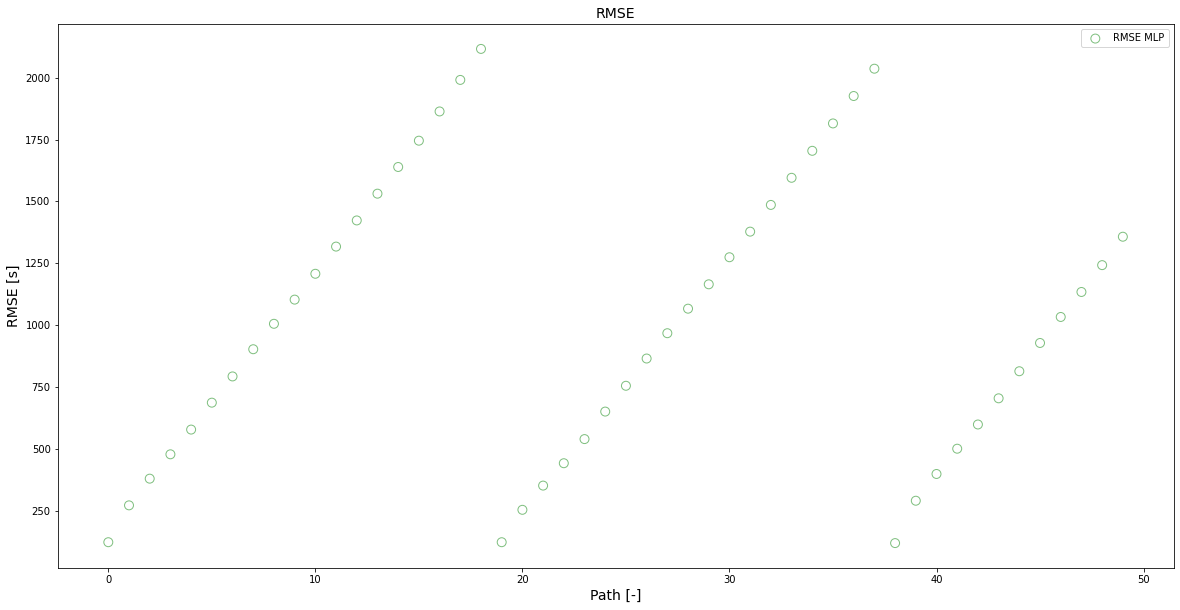

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_trip'],label = "RMSE MLP",linestyle='--',color='b',alpha=0.5)
plt.scatter(x=comb_result.index[:50],y=xs[:,1][:50],label = 'RMSE MLP',s=80, facecolors='none', edgecolors='g',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],label = "RMSE MLP_Kalman",linestyle='-',color='r',alpha=0.5)

plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Path [-]', fontsize=14)

plt.title('RMSE', fontsize = 14)

plt.legend()

### Arrange results table

In [ ]:
xs_sep = []
a = 0
for i in range(len(comb_kf['Path'])):
    if comb_kf['Path'][i] == route_unique[0]:
      a = xs[:, 1][i]
      xs_sep.append(a)
      #print(a)
    else:
      a = xs[:, 1][i] - a
      xs_sep.append(a)
      #print('xxx',a)
      a = xs[:, 1][i]

xs_sep

In [ ]:
xs_sep[-50:]

In [ ]:
comb_kf['MLP_Kalman'] = xs_sep
comb_kf['MLP_Kalman_trip_cum'] = xs[:,1]
comb_kf

## **LSTMGA 1D Kalman**

### Implement Kalman filter

In [ ]:
dt = 0.
R_var = 1. #measure noise variance
Q_var = 1. #process noise variance
#x = np.array([[0, 0]]).T #initial of x^_0 = (t[0], s[0]).T
#P = np.diag([1, 1]) #initial covariance
F = np.array([[1, dt], #transformation matrix
              [0,  1]])
H = np.array([[0., 1.]]) #measurement function
R = np.array([[R_var]]) #measure noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var) #process noise
u = np.array([[-1, 1]]).T #the control input, so $\mathbf{Bu}$ computes the contribution of the controls to the state after the transition

In [ ]:
comb_kf['LSTMGA_1D_trip_cum']

0        129
1        266
2        393
3        520
4        604
        ... 
1618     748
1619     873
1620     967
1621    1060
1622    1163
Name: LSTMGA_1D_trip_cum, Length: 1623, dtype: int64

In [ ]:
end_trip_pred = []
for i in range(len(comb_kf['Path'])):
  if (i != 0) and (comb_kf['Path'][i] == route_unique[0]):
    end_trip_pred.append(comb_kf['LSTMGA_1D_trip_cum'][(i-1)])
  elif i == len(comb_kf['Path'])-1:
    end_trip_pred.append(comb_kf['LSTMGA_1D_trip_cum'][(i)])
  
end_trip_pred

In [ ]:
comb_kf['LSTMGA_1D']

0       129.793530
1       136.613241
2       127.113068
3       126.757844
4        83.870121
           ...    
1618    106.302692
1619    125.221651
1620     94.461248
1621     92.713085
1622    102.512346
Name: LSTMGA_1D, Length: 1623, dtype: float64

In [ ]:
xs, cov = [], []
pos = 0
for z in range(len(comb_kf['Actual_trip_cum'])):
    if (comb_kf['Path'][z] == route_unique[0]) or (z==0):
      x = np.array([[end_trip_pred[pos], 0]]).T #initial of x^_0 = (t[0], s[0]).T
      pos +=1
      P = np.diag([1, 1]) #initial covariance
      #print(pos, x)
    B = comb_kf['LSTMGA_1D'][z]
    # predict
    x = dot(F, x) + dot(B, u)
    xs.append(x.flatten())
    P = dot(F, P).dot(F.T) + Q
    
    #update
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(inv(S))
    y = comb_kf['Actual_trip_cum'][z] - dot(H, x)
    x += dot(K, y)
    P = P - dot(K, H).dot(P)
    
    #xs.append(x.flatten())
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

### Show results

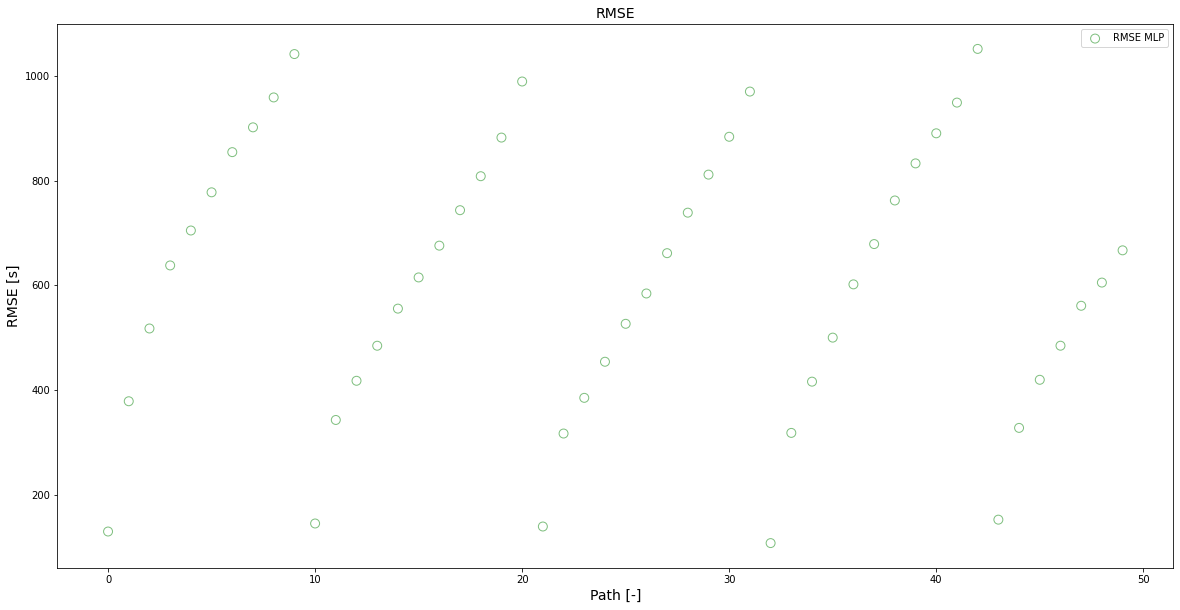

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_trip'],label = "RMSE MLP",linestyle='--',color='b',alpha=0.5)
plt.scatter(x=comb_result.index[:50],y=xs[:,1][:50],label = 'RMSE MLP',s=80, facecolors='none', edgecolors='g',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],label = "RMSE MLP_Kalman",linestyle='-',color='r',alpha=0.5)

plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Path [-]', fontsize=14)

plt.title('RMSE', fontsize = 14)

plt.legend()

### Arrange results table

In [ ]:
xs_sep = []
a = 0
for i in range(len(comb_kf['Path'])):
    if comb_kf['Path'][i] == route_unique[0]:
      a = xs[:, 1][i]
      xs_sep.append(a)
      #print(a)
    else:
      a = xs[:, 1][i] - a
      xs_sep.append(a)
      #print('xxx',a)
      a = xs[:, 1][i]

xs_sep

In [ ]:
xs_sep[-50:]

In [ ]:
comb_kf['LSTMGA_1D_Kalman'] = xs_sep
comb_kf['LSTMGA_1D_Kalman_trip_cum'] = xs[:,1]
comb_kf

## LSTM Kalman

### Implement Kalman filter

In [ ]:
dt = 0.
R_var = 1. #measure noise variance
Q_var = 1. #process noise variance
#x = np.array([[0, 0]]).T #initial of x^_0 = (t[0], s[0]).T
#P = np.diag([1, 1]) #initial covariance
F = np.array([[1, dt], #transformation matrix
              [0,  1]])
H = np.array([[0., 1.]]) #measurement function
R = np.array([[R_var]]) #measure noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var) #process noise
u = np.array([[-1, 1]]).T #the control input, so $\mathbf{Bu}$ computes the contribution of the controls to the state after the transition

In [ ]:
comb_kf.columns[9]

'LSTM_3H_64_trip_cum'

In [ ]:
end_trip_pred = []
for i in range(len(comb_kf['Path'])):
  if (i != 0) and (comb_kf['Path'][i] == route_unique[0]):
    end_trip_pred.append(comb_kf[comb_kf.columns[9]][(i-1)])
  elif i == len(comb_kf['Path'])-1:
    end_trip_pred.append(comb_kf[comb_kf.columns[9]][(i)])
end_trip_pred

In [ ]:
xs, cov = [], []
pos = 0
for z in range(len(comb_kf['Actual_trip_cum'])):
    if (comb_kf['Path'][z] == route_unique[0]) or (z==0):
      x = np.array([[end_trip_pred[pos], 0]]).T #initial of x^_0 = (t[0], s[0]).T
      pos +=1
      P = np.diag([1, 1]) #initial covariance
      #print(pos, x)
    B = comb_kf[comb_kf.columns[8]][z]
    # predict
    x = dot(F, x) + dot(B, u)
    xs.append(x.flatten())
    P = dot(F, P).dot(F.T) + Q
    
    #update
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(inv(S))
    y = comb_kf['Actual_trip_cum'][z] - dot(H, x)
    x += dot(K, y)
    P = P - dot(K, H).dot(P)
    
    #xs.append(x.flatten())
    cov.append(P)

xs, cov = np.array(xs), np.array(cov)

### Show results

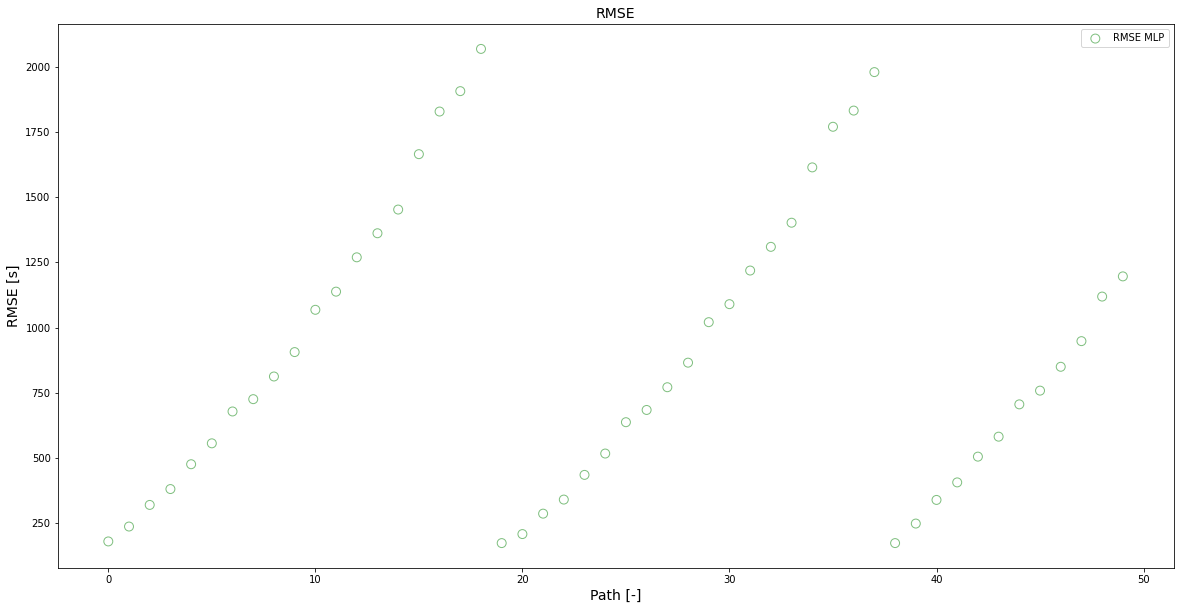

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_trip'],label = "RMSE MLP",linestyle='--',color='b',alpha=0.5)
plt.scatter(x=comb_result.index[:50],y=xs[:,1][:50],label = 'RMSE MLP',s=80, facecolors='none', edgecolors='g',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],label = "RMSE MLP_Kalman",linestyle='-',color='r',alpha=0.5)

plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Path [-]', fontsize=14)

plt.title('RMSE', fontsize = 14)

plt.legend()

### Arrange results table

In [ ]:
xs_sep = []
a = 0
for i in range(len(comb_kf['Path'])):
    if comb_kf['Path'][i] == route_unique[0]:
      a = xs[:, 1][i]
      xs_sep.append(a)
      #print(a)
    else:
      a = xs[:, 1][i] - a
      xs_sep.append(a)
      #print('xxx',a)
      a = xs[:, 1][i]

xs_sep

In [ ]:
comb_kf['LSTM_Kalman'] = xs_sep
comb_kf['LSTM_Kalman_trip_cum'] = xs[:,1]
comb_kf

# RMSE

In [ ]:
#comb_result = comb_kf.copy()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
comb_result= comb_result.drop(['Unnamed: 0'], axis=1)
comb_result.columns

Index(['Date time', 'Path', 'Actual', 'Actual_trip_cum', 'MLP', 'MLP_trip_cum',
       'MLP_Kalman', 'MLP_Kalman_trip_cum', 'LSTM_3H_64',
       'LSTM_3H_64_trip_cum', 'LSTMGA_2H_32', 'LSTMGA_2H_32_trip_cum',
       'MLPGA_3H_16', 'MLPGA_3H_16_trip_cum', 'LSTMGA_Kalman',
       'LSTMGA_Kalman_trip_cum', 'MLPGA_Kalman', 'MLPGA_Kalman_trip_cum',
       'LSTM_Kalman', 'LSTM_Kalman_trip_cum'],
      dtype='object')

In [ ]:
comb_result[:10]

,Date time,Path,Actual,Actual_trip_cum,MLP,MLP_trip_cum,MLP_Kalman,MLP_Kalman_trip_cum,LSTMGA_2H_32,LSTMGA_2H_32_trip_cum,MLPGA_2H_128,MLPGA_2H_128_trip_cum,LSTMGA_1D,LSTMGA_1D_trip_cum,LSTMGA_Kalman,LSTMGA_Kalman_trip_cum,MLPGA_Kalman,MLPGA_Kalman_trip_cum,LSTMGA_1D_Kalman,LSTMGA_1D_Kalman_trip_cum
0,2019-01-23 21:10:00,U Wandsbek Markt|Wandsbeker Allee,216.0,215,79.161110,79,79.161110,79.161110,266.960595,266,228.909153,228,198.220357,198,266.960595,266.960595,228.909153,228.909153,198.220357,198.220357
1,2019-01-23 21:13:00,Wandsbeker Allee|U Straßburger Straße,78.0,294,80.044886,159,147.964331,227.125441,84.356677,351,70.555387,299,77.587133,275,58.376379,325.336974,63.600810,292.509963,85.976955,284.197311
2,2019-01-23 21:15:00,U Straßburger Straße|U Alter Teichweg,66.0,360,79.245986,238,101.537505,328.662947,86.072376,437,77.460693,376,109.634650,385,75.626718,400.963692,77.957372,370.467335,112.902213,397.099524
3,2019-01-23 21:16:00,U Alter Teichweg|Habichtstraße (Mitte),120.0,480,79.589938,318,87.424202,416.087148,114.295340,551,115.715888,492,113.518632,498,104.054417,505.018109,113.099054,483.566389,104.243751,501.343275
4,2019-01-23 21:18:00,Habichtstraße (Mitte)|U Habichtstraße,60.0,540,79.394686,397,92.177256,508.264405,61.158532,612,57.563923,550,76.453290,575,56.154911,561.173019,56.850645,540.417034,72.184635,573.527910
5,2019-01-23 21:19:00,U Habichtstraße|Habichtsplatz,78.0,618,79.053098,476,84.342364,592.606769,79.697339,692,76.288044,626,73.579171,648,76.168502,637.341522,76.218539,616.635573,67.991186,641.519096
6,2019-01-23 21:20:00,Habichtsplatz|Neue Wöhr,90.0,708,80.581149,557,84.208753,676.815522,101.987263,794,110.583419,737,114.645673,763,99.224188,736.565710,110.778337,727.413910,111.285802,752.804898
7,2019-01-23 21:22:00,Neue Wöhr|Hartzloh,72.0,780,80.667804,637,84.565864,761.381386,51.079824,845,53.203535,790,70.199631,833,47.509110,784.074821,50.776796,778.190707,64.599019,817.403917
8,2019-01-23 21:23:00,Hartzloh|AK Barmbek,66.0,846,77.593473,715,79.662207,841.043594,51.219878,896,52.684460,842,67.539172,901,50.767120,834.841941,52.885493,831.076200,63.383181,880.787098
9,2019-01-23 21:24:00,AK Barmbek|Hebebrandstraße,108.0,954,79.417877,794,79.913518,920.957112,83.788709,980,88.507781,931,87.523678,988,84.904515,919.746455,90.000161,921.076360,84.044968,964.832066


## Route 101 in April


In [ ]:
#for 101
#RMSE
print('Individual,RMSE,'+ comb_result.columns[5]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,RMSE,'+ comb_result.columns[7]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[11]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,RMSE,'+ comb_result.columns[-12]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-12]])))
print('Individual,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,RMSE,'+ comb_result.columns[-14]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-14]])))
print('Individual,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Accumulation,RMSE,'+ comb_result.columns[5]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,RMSE,'+ comb_result.columns[7]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[11]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,RMSE,'+ comb_result.columns[-12]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-11]])))
print('Accumulation,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,RMSE,'+ comb_result.columns[-14]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-13]])))
print('Accumulation,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
#-----
print('Individual,MAE,'+ comb_result.columns[5]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,MAE,'+ comb_result.columns[7]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[11]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAE,'+ comb_result.columns[-12]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-12]])))
print('Individual,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,MAE,'+ comb_result.columns[-14]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-14]])))
print('Individual,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Accumulation,MAE,'+ comb_result.columns[5]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,MAE,'+ comb_result.columns[7]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[11]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAE,'+ comb_result.columns[-12]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-11]])))
print('Accumulation,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,MAE,'+ comb_result.columns[-14]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-13]])))
print('Accumulation,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))

#----
#MAPE
print('Individual,MAPE,'+ comb_result.columns[5]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,MAPE,'+ comb_result.columns[7]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[11]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAPE,'+ comb_result.columns[-12]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-12]])))
print('Individual,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,MAPE,'+ comb_result.columns[-14]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-14]])))
print('Individual,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Accumulation,MAPE,'+ comb_result.columns[5]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,MAPE,'+ comb_result.columns[7]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[11]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAPE,'+ comb_result.columns[-12]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-11]])))
print('Accumulation,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,MAPE,'+ comb_result.columns[-14]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-13]])))
print('Accumulation,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))



Individual,RMSE,MLP, 116.20940661011423
Individual,RMSE,MLP_Kalman, 118.44913867027996
Individual,RMSE,LSTM_2H_16, 124.74930650153152
Individual,RMSE,LSTM_Kalman, 122.48943704604538
Individual,RMSE,MLPGA_4H_16, 85.7533604686511
Individual,RMSE,MLPGA_Kalman, 87.18408380202015
Individual,RMSE,LSTMGA_2H_16, 89.84201750774339
Individual,RMSE,LSTMGA_Kalman, 90.97826038502363
Individual,RMSE,LSTMGA_1D, 111.2701841356696
Individual,RMSE,LSTMGA_1D_Kalman, 115.82672841493462
Accumulation,RMSE,MLP, 296.89084484421295
Accumulation,RMSE,MLP_Kalman, 169.77758035258512
Accumulation,RMSE,LSTM_2H_16, 402.34078798133834
Accumulation,RMSE,LSTM_Kalman, 236.5042965864722
Accumulation,RMSE,MLPGA_4H_16, 175.5699020658115
Accumulation,RMSE,MLPGA_Kalman, 110.19242485176424
Accumulation,RMSE,LSTMGA_2H_16, 217.488045436016
Accumulation,RMSE,LSTMGA_Kalman, 122.22073225075006
Accumulation,RMSE,LSTMGA_1D, 472.231119073403
Accumulation,RMSE,LSTMGA_1D_Kalman, 150.45601536688238
Individual,MAE,MLP, 67.61002019901593


In [ ]:
comb_result.columns[-9]

'MLPGA_4H_16_trip_cum'

## Route 102, 202 in April

In [ ]:
#for 102,202
from sklearn.metrics import mean_squared_error
#RMSE
print('Individual,RMSE,'+ comb_result.columns[4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,RMSE,'+ comb_result.columns[6]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[8]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,RMSE,'+ comb_result.columns[12]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,RMSE,'+ comb_result.columns[4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,RMSE,'+ comb_result.columns[6]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[8]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,RMSE,'+ comb_result.columns[12]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[13]])))
print('Accumulation,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))

#--
#MAE
print('Individual,MAE,'+ comb_result.columns[4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,MAE,'+ comb_result.columns[6]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[8]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAE,'+ comb_result.columns[12]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,MAE,'+ comb_result.columns[4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,MAE,'+ comb_result.columns[6]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[8]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAE,'+ comb_result.columns[12]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[13]])))
print('Accumulation,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))

#---
#MAPE
print('Individual,MAPE,'+ comb_result.columns[4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,MAPE,'+ comb_result.columns[6]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[8]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAPE,'+ comb_result.columns[12]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,MAPE,'+ comb_result.columns[4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,MAPE,'+ comb_result.columns[6]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[8]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAPE,'+ comb_result.columns[12]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[13]])))
print('Accumulation,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))


Individual,RMSE,MLP, 69.56231006246261
Individual,RMSE,MLP_Kalman, 69.78516148251177
Individual,RMSE,LSTM_3H_64, 41.47955612662635
Individual,RMSE,LSTM_Kalman, 41.339739612302914
Individual,RMSE,MLPGA_3H_16, 41.60949724042417
Individual,RMSE,MLPGA_Kalman, 41.3954105124419
Individual,RMSE,LSTMGA_2H_32, 41.648944987380375
Individual,RMSE,LSTMGA_Kalman, 41.61449605880633
Accumulation,RMSE,MLP, 257.3944724911454
Accumulation,RMSE,MLP_Kalman, 167.60420875575068
Accumulation,RMSE,LSTM_3H_64, 134.29962990116334
Accumulation,RMSE,LSTM_Kalman, 96.39265569460895
Accumulation,RMSE,MLPGA_3H_16, 135.3649090005915
Accumulation,RMSE,MLPGA_Kalman, 98.65663441142422
Accumulation,RMSE,LSTMGA_2H_32, 127.58829346800749
Accumulation,RMSE,LSTMGA_Kalman, 93.7658490953026
Individual,MAE,MLP, 53.069857288621954
Individual,MAE,MLP_Kalman, 52.00892939983712
Individual,MAE,LSTM_3H_64, 27.893494107540768
Individual,MAE,LSTM_Kalman, 28.15732476544014
Individual,MAE,MLPGA_3H_16, 28.057232561276287
Individual,MAE,MLP

## Route 201 in April

In [ ]:
#for 201
#RMSE
print('Individual,RMSE,'+ comb_result.columns[5]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,RMSE,'+ comb_result.columns[7]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[11]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,RMSE,'+ comb_result.columns[5]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,RMSE,'+ comb_result.columns[7]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[11]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))

#for 201
#MAE
print('Individual,MAE,'+ comb_result.columns[5]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,MAE,'+ comb_result.columns[7]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[11]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,MAE,'+ comb_result.columns[5]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,MAE,'+ comb_result.columns[7]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[11]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))

#for 201
#MAPE
print('Individual,MAPE,'+ comb_result.columns[5]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[5]])))
print('Individual,MAPE,'+ comb_result.columns[7]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[11]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[11]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Individual,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Accumulation,MAPE,'+ comb_result.columns[5]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[6]])))
print('Accumulation,MAPE,'+ comb_result.columns[7]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[11]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[12]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
print('Accumulation,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))



Individual,RMSE,MLP, 94.53741280380478
Individual,RMSE,MLP_Kalman, 95.9261654059879
Individual,RMSE,LSTM_2H_64, 75.38012580156264
Individual,RMSE,LSTM_Kalman, 77.99272521938627
Individual,RMSE,MLPGA_2H_16, 51.625437831572754
Individual,RMSE,MLPGA_Kalman, 52.918317230926306
Individual,RMSE,LSTMGA_3H_32, 56.31730155756945
Individual,RMSE,LSTMGA_Kalman, 57.25420535422562
Accumulation,RMSE,MLP, 386.60349428523585
Accumulation,RMSE,MLP_Kalman, 205.2817111288265
Accumulation,RMSE,LSTM_2H_64, 335.66434540933176
Accumulation,RMSE,LSTM_Kalman, 145.34060369858202
Accumulation,RMSE,MLPGA_2H_16, 218.26352826816745
Accumulation,RMSE,MLPGA_Kalman, 106.78784515128427
Accumulation,RMSE,LSTMGA_3H_32, 269.7332932909376
Accumulation,RMSE,LSTMGA_Kalman, 131.19666763268086
Individual,MAE,MLP, 62.15253546807544
Individual,MAE,MLP_Kalman, 64.93411501005743
Individual,MAE,LSTM_2H_64, 47.99250457542681
Individual,MAE,LSTM_Kalman, 52.11354879227017
Individual,MAE,MLPGA_2H_16, 30.094449649095562
Individual,MAE,M

## Route 101 in other months

In [ ]:
print('Individual,RMSE,'+ comb_result.columns[4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,RMSE,'+ comb_result.columns[6]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[8]+',',np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Accumulation,RMSE,'+ comb_result.columns[4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,RMSE,'+ comb_result.columns[6]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[8]+',',np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,RMSE,'+ comb_result.columns[-6]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,RMSE,'+ comb_result.columns[-10]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,RMSE,'+ comb_result.columns[-4]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,RMSE,'+ comb_result.columns[-8]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,RMSE,'+ comb_result.columns[-2]+',', np.sqrt(mean_squared_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
#---------
print('Individual,MAE,'+ comb_result.columns[4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,MAE,'+ comb_result.columns[6]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[8]+',',(mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Accumulation,MAE,'+ comb_result.columns[4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,MAE,'+ comb_result.columns[6]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[8]+',',(mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,MAE,'+ comb_result.columns[-6]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,MAE,'+ comb_result.columns[-10]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAE,'+ comb_result.columns[-4]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAE,'+ comb_result.columns[-8]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAE,'+ comb_result.columns[-2]+',', (mean_absolute_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))
#----
print('Individual,MAPE,'+ comb_result.columns[4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,MAPE,'+ comb_result.columns[6]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[8]+',',(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Accumulation,MAPE,'+ comb_result.columns[4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,MAPE,'+ comb_result.columns[6]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[8]+',',(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[-6]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,MAPE,'+ comb_result.columns[-10]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAPE,'+ comb_result.columns[-4]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAPE,'+ comb_result.columns[-8]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAPE,'+ comb_result.columns[-2]+',', (mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))

Individual,RMSE,MLP, 61.71245231709627
Individual,RMSE,MLP_Kalman, 65.03385822813408
Individual,RMSE,LSTMGA_2H_32, 31.205515063597804
Individual,RMSE,LSTMGA_Kalman, 31.98540630687896
Individual,RMSE,MLPGA_2H_128, 30.326020746294063
Individual,RMSE,MLPGA_Kalman, 31.039015975542327
Individual,RMSE,LSTMGA_1D, 40.5782678696635
Individual,RMSE,LSTMGA_1D_Kalman, 42.14028115849135
Accumulation,RMSE,MLP, 202.08691647344412
Accumulation,RMSE,MLP_Kalman, 97.37186396140694
Accumulation,RMSE,LSTMGA_2H_32, 83.4681260976065
Accumulation,RMSE,LSTMGA_Kalman, 49.527343411596405
Accumulation,RMSE,MLPGA_2H_128, 78.56005431878701
Accumulation,RMSE,MLPGA_Kalman, 48.758576280462194
Accumulation,RMSE,LSTMGA_1D, 113.435657938231
Accumulation,RMSE,LSTMGA_1D_Kalman, 63.801166959003496
Individual,MAE,MLP, 43.9243615986023
Individual,MAE,MLP_Kalman, 49.59754170254535
Individual,MAE,LSTMGA_2H_32, 21.03351302586686
Individual,MAE,LSTMGA_Kalman, 21.640661263728422
Individual,MAE,MLPGA_2H_128, 20.35366485947246
Indiv

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error
#MAPE
print('Individual,MAPE,'+ comb_result.columns[4]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[4]])))
print('Individual,MAPE,'+ comb_result.columns[6]+',',np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[6]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[8]+',',np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[8]]))) #get better results when tune with Kalman filter
print('Individual,MAPE,'+ comb_result.columns[-6]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-6]])))
print('Individual,MAPE,'+ comb_result.columns[-10]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-10]])))
print('Individual,MAPE,'+ comb_result.columns[-4]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-4]])))
print('Individual,MAPE,'+ comb_result.columns[-8]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-8]])))
print('Individual,MAPE,'+ comb_result.columns[-2]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual'],comb_result[comb_result.columns[-2]])))
print('Accumulation,MAPE,'+ comb_result.columns[4]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[5]])))
print('Accumulation,MAPE,'+ comb_result.columns[6]+',',np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[7]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[8]+',',np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[9]]))) #get better results when tune with Kalman filter
print('Accumulation,MAPE,'+ comb_result.columns[-6]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-5]])))
print('Accumulation,MAPE,'+ comb_result.columns[-10]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-9]])))
print('Accumulation,MAPE,'+ comb_result.columns[-4]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-3]])))
print('Accumulation,MAPE,'+ comb_result.columns[-8]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-7]])))
print('Accumulation,MAPE,'+ comb_result.columns[-2]+',', np.sqrt(mean_absolute_percentage_error(comb_result['Actual_trip_cum'],comb_result[comb_result.columns[-1]])))

Individual,MAPE,MLP, 7.762391893918111
Individual,MAPE,MLP_Kalman, 8.403975005691686
Individual,MAPE,LSTMGA_2H_32, 5.228174029637765
Individual,MAPE,LSTMGA_Kalman, 5.23307089977283
Individual,MAPE,MLPGA_2H_128, 5.087386013377382
Individual,MAPE,MLPGA_Kalman, 5.21114920651841
Individual,MAPE,LSTMGA_1D, 6.066706878967017
Individual,MAPE,LSTMGA_1D_Kalman, 6.38367231369605
Accumulation,MAPE,MLP, 5.277372804592517
Accumulation,MAPE,MLP_Kalman, 3.830771894167502
Accumulation,MAPE,LSTMGA_2H_32, 3.22502474996082
Accumulation,MAPE,LSTMGA_Kalman, 2.563840886479245
Accumulation,MAPE,MLPGA_2H_128, 2.99232968164729
Accumulation,MAPE,MLPGA_Kalman, 2.437416578734805
Accumulation,MAPE,LSTMGA_1D, 3.5908831766144744
Accumulation,MAPE,LSTMGA_1D_Kalman, 2.8208975140561985


## Create graph

In [ ]:
comb_result['Date time']= pd.to_datetime(comb_result['Date time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
comb_result.dtypes
#datetime.strptime(comb_result['Date time'], '%Y %m %d %I:%M%p')
#np.datetime64(comb_result['Date time'])

Date time                    datetime64[ns]
Path                                 object
Actual                              float64
Actual_trip_cum                       int64
MLP                                 float64
MLP_trip_cum                          int64
MLP_Kalman                          float64
MLP_Kalman_trip_cum                 float64
LSTMGA_2H_32                        float64
LSTMGA_2H_32_trip_cum                 int64
MLPGA_2H_128                        float64
MLPGA_2H_128_trip_cum                 int64
LSTMGA_1D                           float64
LSTMGA_1D_trip_cum                    int64
LSTMGA_Kalman                       float64
LSTMGA_Kalman_trip_cum              float64
MLPGA_Kalman                        float64
MLPGA_Kalman_trip_cum               float64
LSTMGA_1D_Kalman                    float64
LSTMGA_1D_Kalman_trip_cum           float64
dtype: object

In [ ]:
calendar.month_name[month]

'January'

In [ ]:
comb_result.columns[-6]

'LSTMGA_Kalman'

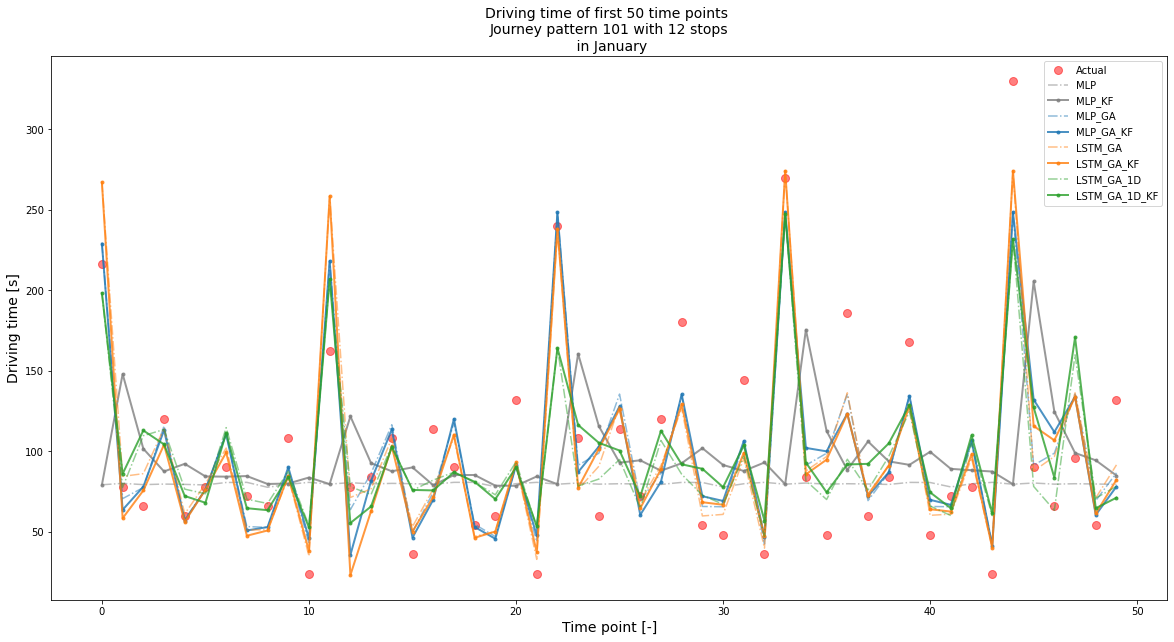

In [ ]:
plt.figure(figsize=(20,10))

#101 others
plt.plot(comb_result['Actual'][:50], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][:50],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][:50],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][:50],'-.',color='tab:blue',label = 'MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][:50],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[8]][:50],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][:50],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-8]][:50],'-.',color='tab:green',label = 'LSTM_GA_1D',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][:50],'.-',color='tab:green',label = 'LSTM_GA_1D_KF',alpha=0.8, linewidth=2)
'''
#101
plt.plot(comb_result['Actual'][:50], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][:50],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][:50],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[11]][:50],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][:50],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-12]][:50],'-.',color='tab:blue',label = 'MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][:50],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-14]][:50],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-8]][:50],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][:50],'-.',color='tab:green',label = 'LSTM_GA_1D',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][:50],'.-',color='tab:green',label = 'LSTM_GA_1D_KF',alpha=0.8, linewidth=2)

#102,202
plt.plot(comb_result['Actual'][:50], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][:50],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][:50],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[8]][:50],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][:50],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[12]][:50],'-.',color='tab:blue',label ='MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][:50],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][:50],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][:50],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)

#201
plt.plot(comb_result['Actual'][:50], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][:50],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][:50],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[11]][:50],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][:50],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-8]][:50],'-.',color='tab:blue',label ='MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][:50],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][:50],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][:50],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
'''
plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('Time point [-]', fontsize=14)

plt.title('Driving time of first 50 time points \n' +path_name + '\n in '+ calendar.month_name[month], fontsize = 14)

plt.legend()

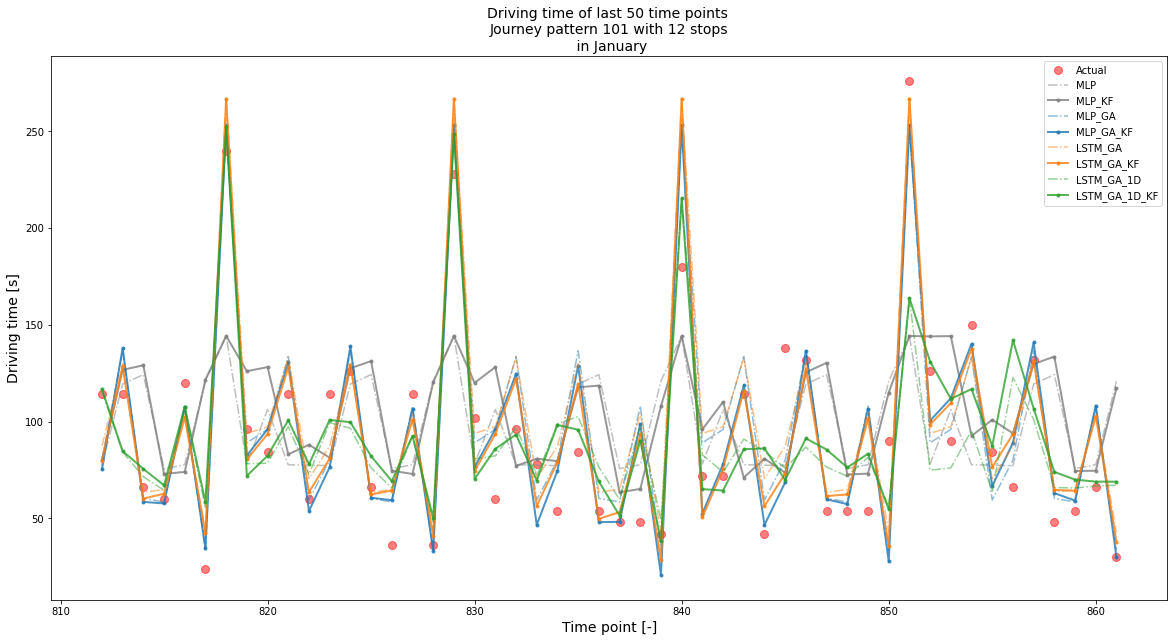

In [ ]:
plt.figure(figsize=(20,10))

#101 others
plt.plot(comb_result['Actual'][-50:], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][-50:],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][-50:],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][-50:],'-.',color='tab:blue',label = 'MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][-50:],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[8]][-50:],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][-50:],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-8]][-50:],'-.',color='tab:green',label = 'LSTM_GA_1D',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][-50:],'.-',color='tab:green',label = 'LSTM_GA_1D_KF',alpha=0.8, linewidth=2)
'''
#101
plt.plot(comb_result['Actual'][-50:], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][-50:],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][-50:],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[11]][-50:],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][-50:],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-12]][-50:],'-.',color='tab:blue',label = 'MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][-50:],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-14]][-50:],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-8]][-50:],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][-50:],'-.',color='tab:green',label = 'LSTM_GA_1D',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][-50:],'.-',color='tab:green',label = 'LSTM_GA_1D_KF',alpha=0.8, linewidth=2)

#102,202
plt.plot(comb_result['Actual'][-50:], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][-50:],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][-50:],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[8]][-50:],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][-50:],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[12]][-50:],'-.',color='tab:blue',label ='MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][-50:],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][-50:],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][-50:],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)

#201
plt.plot(comb_result['Actual'][-50:], 'o',color = 'r', label = 'Actual',alpha=0.5, markersize=8)
plt.plot(comb_result['MLP'][-50:],'-.',color='tab:gray',label = "MLP",alpha=0.5)
plt.plot(comb_result['MLP_Kalman'][-50:],'.-',color='tab:gray', label = "MLP_KF",alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[11]][-50:],'-.',color='tab:brown',label = 'LSTM',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-2]][-50:],'-.',color='tab:brown',label = 'LSTM_KF',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-8]][-50:],'-.',color='tab:blue',label ='MLP_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-4]][-50:],'.-',color='tab:blue',label = 'MLP_GA_KF',alpha=0.8, linewidth=2)
plt.plot(comb_result[comb_result.columns[-10]][-50:],'-.',color='tab:orange',label = 'LSTM_GA',alpha=0.5)
plt.plot(comb_result[comb_result.columns[-6]][-50:],'.-',color='tab:orange',label = 'LSTM_GA_KF',alpha=0.8, linewidth=2)
'''
plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('Time point [-]', fontsize=14)

plt.title('Driving time of last 50 time points \n' +path_name+ '\n in '+ calendar.month_name[month], fontsize = 14)

plt.legend()

In [ ]:
str(comb_result.columns[-2] )

'LSTMGA_1D_Kalman'

In [ ]:
def rmse(g):
  '''
  #others
  rmse_MLP = np.sqrt( mean_squared_error(g['Actual'], g['MLP'] ))
  rmse_MLP_Kalman = np.sqrt( mean_squared_error( g['Actual'], g['MLP_Kalman'] ) )
  #rmse_LSTMGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-10]] ))
  rmse_LSTMGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[8]] ))
  rmse_LSTMGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-6]] ))
  rmse_MLPGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[10]] ))
  rmse_MLPGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-4]] ))
  rmse_LSTMGA_1D = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-8]] ))
  rmse_LSTMGA_1D_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-2]] ))
  
  rmse_MLP_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g['MLP_trip_cum'] ))
  rmse_MLP_Kalman_trip = np.sqrt( mean_squared_error( g['Actual_trip_cum'], g['MLP_Kalman_trip_cum'] ) )
  #rmse_LSTMGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-9]] ))
  rmse_LSTMGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[9]] ))
  rmse_LSTMGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-5]] ))
  rmse_MLPGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[11]] ))
  rmse_MLPGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-3]] ))
  rmse_LSTMGA_1D_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-7]] ))
  rmse_LSTMGA_1D_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-1]] ))
  '''
  #route 101
  rmse_MLP = np.sqrt( mean_squared_error(g['Actual'], g['MLP'] ))
  rmse_MLP_Kalman = np.sqrt( mean_squared_error( g['Actual'], g['MLP_Kalman'] ) )
  rmse_MLPGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-12]] ))
  rmse_MLPGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-6]] ))
  rmse_LSTM = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[11]] ))
  rmse_LSTM_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-2]] ))
  rmse_LSTMGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-14]] ))
  rmse_LSTMGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-8]] ))
  rmse_LSTMGA_1D = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-10]] ))
  rmse_LSTMGA_1D_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-4]] ))
  
  rmse_MLP_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g['MLP_trip_cum'] ))
  rmse_MLP_Kalman_trip = np.sqrt( mean_squared_error( g['Actual_trip_cum'], g['MLP_Kalman_trip_cum'] ) )
  rmse_MLPGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-11]] ))
  rmse_MLPGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-5]] ))
  rmse_LSTM_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[12]] ))
  rmse_LSTM_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-1]] ))
  rmse_LSTMGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-13]] ))
  rmse_LSTMGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-7]] ))
  rmse_LSTMGA_1D_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-9]] ))
  rmse_LSTMGA_1D_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-3]] ))
  '''
  #route 102,202
  rmse_MLP = np.sqrt( mean_squared_error(g['Actual'], g['MLP'] ))
  rmse_MLP_Kalman = np.sqrt( mean_squared_error( g['Actual'], g['MLP_Kalman'] ) )
  rmse_MLPGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[12]] ))
  rmse_MLPGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-4]] ))
  rmse_LSTM = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[8]] ))
  rmse_LSTM_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-2]] ))
  rmse_LSTMGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-10]] ))
  rmse_LSTMGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-6]] ))
  
  rmse_MLP_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g['MLP_trip_cum'] ))
  rmse_MLP_Kalman_trip = np.sqrt( mean_squared_error( g['Actual_trip_cum'], g['MLP_Kalman_trip_cum'] ) )
  rmse_MLPGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[13]] ))
  rmse_MLPGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-3]] ))
  rmse_LSTM_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[9]] ))
  rmse_LSTM_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-1]] ))
  rmse_LSTMGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-9]] ))
  rmse_LSTMGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-5]] ))
  
  #route 201
  rmse_MLP = np.sqrt( mean_squared_error(g['Actual'], g['MLP'] ))
  rmse_MLP_Kalman = np.sqrt( mean_squared_error( g['Actual'], g['MLP_Kalman'] ) )
  rmse_LSTM = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[11]] ))
  rmse_LSTM_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-2]] ))
  rmse_MLPGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-8]] ))
  rmse_MLPGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-4]] ))
  rmse_LSTMGA = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-10]] ))
  rmse_LSTMGA_Kalman = np.sqrt( mean_squared_error(g['Actual'], g[comb_result.columns[-6]] ))
  
  rmse_MLP_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g['MLP_trip_cum'] ))
  rmse_MLP_Kalman_trip = np.sqrt( mean_squared_error( g['Actual_trip_cum'], g['MLP_Kalman_trip_cum'] ) )
  rmse_LSTM_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[12]] ))
  rmse_LSTM_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-1]] ))
  rmse_MLPGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-7]] ))
  rmse_MLPGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-3]] ))
  rmse_LSTMGA_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-9]] ))
  rmse_LSTMGA_Kalman_trip = np.sqrt( mean_squared_error(g['Actual_trip_cum'], g[comb_result.columns[-5]] ))
  '''

  return pd.Series( dict(rmse_MLP= rmse_MLP, rmse_MLP_trip= rmse_MLP_trip,
                          rmse_MLP_Kalman = rmse_MLP_Kalman, rmse_MLP_Kalman_trip = rmse_MLP_Kalman_trip, 
                          rmse_MLPGA = rmse_MLPGA, rmse_MLPGA_trip = rmse_MLPGA_trip,
                          rmse_MLPGA_Kalman = rmse_MLPGA_Kalman, rmse_MLPGA_Kalman_trip = rmse_MLPGA_Kalman_trip,
                          rmse_LSTM = rmse_LSTM, rmse_LSTM_trip= rmse_LSTM_trip,
                          rmse_LSTM_Kalman = rmse_LSTM_Kalman, rmse_LSTM_Kalman_trip = rmse_LSTM_Kalman_trip,
                          rmse_LSTMGA = rmse_LSTMGA, rmse_LSTMGA_trip= rmse_LSTMGA_trip,
                          rmse_LSTMGA_Kalman = rmse_LSTMGA_Kalman, rmse_LSTMGA_Kalman_trip = rmse_LSTMGA_Kalman_trip,
                          rmse_LSTMGA_1D = rmse_LSTMGA_1D, rmse_LSTMGA_1D_trip= rmse_LSTMGA_1D_trip,
                          rmse_LSTMGA_1D_Kalman = rmse_LSTMGA_1D_Kalman, rmse_LSTMGA_1D_Kalman_trip = rmse_LSTMGA_1D_Kalman_trip,
                          ) )

comb_result_rmse = comb_result.groupby('Path').apply(rmse).reset_index()
#comb_result_rmse = comb_result_rmse.rename({'nn': 'rmse_'+ comb_result.columns[9], 
#                                            'll': 'rmse_'+ comb_result.columns[10]}, axis= 1)
comb_result_rmse

,Path,rmse_MLP,rmse_MLP_trip,rmse_MLP_Kalman,rmse_MLP_Kalman_trip,rmse_MLPGA,rmse_MLPGA_trip,rmse_MLPGA_Kalman,rmse_MLPGA_Kalman_trip,rmse_LSTM,rmse_LSTM_trip,rmse_LSTM_Kalman,rmse_LSTM_Kalman_trip,rmse_LSTMGA,rmse_LSTMGA_trip,rmse_LSTMGA_Kalman,rmse_LSTMGA_Kalman_trip,rmse_LSTMGA_1D,rmse_LSTMGA_1D_trip,rmse_LSTMGA_1D_Kalman,rmse_LSTMGA_1D_Kalman_trip
0,AK Barmbek|Hebebrandstraße,30.590486,287.374791,30.737345,140.267541,28.472505,185.810678,26.944080,76.526381,85.533161,524.854761,65.248102,307.565977,28.972686,238.151241,26.613879,87.675564,33.708180,427.129205,31.689357,98.013861
1,Habichtsplatz|Neue Wöhr,41.085971,311.431575,41.564662,109.009190,32.925761,172.455890,32.780057,79.919444,60.761871,400.420561,49.344648,182.651388,32.675890,222.285439,31.446502,92.290716,45.310081,446.768236,41.599086,123.465874
2,Habichtstraße (Mitte)|U Habichtstraße,66.117358,326.275978,97.740490,138.274773,23.076614,162.764155,31.387542,86.388401,66.297605,352.487362,83.272062,166.012176,23.277029,210.447919,38.377508,102.290612,62.255785,419.721563,90.241453,137.104307
3,Hartzloh|AK Barmbek,49.192442,275.409479,43.207485,145.141393,18.124443,174.765518,18.964410,69.181542,87.825951,465.287644,72.758805,258.608307,18.406007,225.746441,19.479830,79.599217,27.358019,411.810157,31.481627,90.267797
4,Hebebrandstraße|S Rübenkamp,251.470793,375.930314,248.184912,312.307867,235.999094,308.322149,235.292474,253.679583,261.256976,630.639722,252.712871,445.157175,236.345113,340.291102,235.631758,257.319308,246.184263,432.941245,246.662888,258.841985
5,Neue Wöhr|Hartzloh,74.853190,285.399495,74.909108,126.118828,16.209363,173.825732,18.502103,72.617907,77.473374,424.537141,68.128394,210.999134,17.720236,223.735244,20.042178,84.218150,33.601606,425.738214,41.095246,102.272058
6,U Alter Teichweg|Habichtstraße (Mitte),141.570399,365.887555,124.563906,211.427299,76.491881,159.234868,75.126662,104.467898,129.627466,360.791716,114.575427,204.676651,88.850719,212.054764,83.179288,130.663937,138.990850,463.228790,124.301053,200.781731
7,U Habichtstraße|Habichtsplatz,41.301525,305.124899,54.057540,109.176272,24.903762,165.299913,27.798363,78.178054,51.735285,360.011149,52.225872,159.931021,23.955847,211.074865,28.738629,89.815257,24.872699,413.833111,36.672704,114.281467
8,U Straßburger Straße|U Alter Teichweg,58.561343,251.251597,69.104785,121.489679,44.896031,129.865705,50.902185,76.697789,67.457409,260.558690,69.263091,136.916076,47.667265,165.409096,51.883004,91.180050,54.891708,345.613917,58.762506,111.858336
9,U Wandsbek Markt|Wandsbeker Allee,198.423378,198.771944,198.423378,198.396963,94.530172,94.554415,94.530172,94.552784,204.000656,204.420934,204.000656,203.977551,118.926348,119.023979,118.926348,118.942098,195.936994,861.942850,195.936994,195.913237


In [ ]:
comb_result_rmse['Path'] = comb_result_rmse['Path'] .astype("category")
comb_result_rmse['Path'] .cat.set_categories(route_unique, inplace=True)

print(comb_result_rmse['Path'])
comb_result_rmse = comb_result_rmse.sort_values(["Path"]).reset_index()
comb_result_rmse

0                 AK Barmbek|Hebebrandstraße
1                    Habichtsplatz|Neue Wöhr
2      Habichtstraße (Mitte)|U Habichtstraße
3                        Hartzloh|AK Barmbek
4                Hebebrandstraße|S Rübenkamp
5                         Neue Wöhr|Hartzloh
6     U Alter Teichweg|Habichtstraße (Mitte)
7              U Habichtstraße|Habichtsplatz
8      U Straßburger Straße|U Alter Teichweg
9          U Wandsbek Markt|Wandsbeker Allee
10     Wandsbeker Allee|U Straßburger Straße
Name: Path, dtype: category
Categories (11, object): ['U Wandsbek Markt|Wandsbeker Allee', 'Wandsbeker Allee|U Straßburger Straße',
                          'U Straßburger Straße|U Alter Teichweg', 'U Alter Teichweg|Habichtstraße (Mitte)', ...,
                          'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek', 'AK Barmbek|Hebebrandstraße',
                          'Hebebrandstraße|S Rübenkamp']


,index,Path,rmse_MLP,rmse_MLP_trip,rmse_MLP_Kalman,rmse_MLP_Kalman_trip,rmse_MLPGA,rmse_MLPGA_trip,rmse_MLPGA_Kalman,rmse_MLPGA_Kalman_trip,rmse_LSTM,rmse_LSTM_trip,rmse_LSTM_Kalman,rmse_LSTM_Kalman_trip,rmse_LSTMGA,rmse_LSTMGA_trip,rmse_LSTMGA_Kalman,rmse_LSTMGA_Kalman_trip,rmse_LSTMGA_1D,rmse_LSTMGA_1D_trip,rmse_LSTMGA_1D_Kalman,rmse_LSTMGA_1D_Kalman_trip
0,9,U Wandsbek Markt|Wandsbeker Allee,198.423378,198.771944,198.423378,198.396963,94.530172,94.554415,94.530172,94.552784,204.000656,204.420934,204.000656,203.977551,118.926348,119.023979,118.926348,118.942098,195.936994,861.942850,195.936994,195.913237
1,10,Wandsbeker Allee|U Straßburger Straße,74.996255,234.780547,101.722579,144.447435,67.693144,117.462760,81.503952,86.117456,89.699211,236.197638,123.441573,147.646121,69.156767,147.678454,82.672107,101.107369,72.050331,332.615668,120.092115,123.903309
2,8,U Straßburger Straße|U Alter Teichweg,58.561343,251.251597,69.104785,121.489679,44.896031,129.865705,50.902185,76.697789,67.457409,260.558690,69.263091,136.916076,47.667265,165.409096,51.883004,91.180050,54.891708,345.613917,58.762506,111.858336
3,6,U Alter Teichweg|Habichtstraße (Mitte),141.570399,365.887555,124.563906,211.427299,76.491881,159.234868,75.126662,104.467898,129.627466,360.791716,114.575427,204.676651,88.850719,212.054764,83.179288,130.663937,138.990850,463.228790,124.301053,200.781731
4,2,Habichtstraße (Mitte)|U Habichtstraße,66.117358,326.275978,97.740490,138.274773,23.076614,162.764155,31.387542,86.388401,66.297605,352.487362,83.272062,166.012176,23.277029,210.447919,38.377508,102.290612,62.255785,419.721563,90.241453,137.104307
5,7,U Habichtstraße|Habichtsplatz,41.301525,305.124899,54.057540,109.176272,24.903762,165.299913,27.798363,78.178054,51.735285,360.011149,52.225872,159.931021,23.955847,211.074865,28.738629,89.815257,24.872699,413.833111,36.672704,114.281467
6,1,Habichtsplatz|Neue Wöhr,41.085971,311.431575,41.564662,109.009190,32.925761,172.455890,32.780057,79.919444,60.761871,400.420561,49.344648,182.651388,32.675890,222.285439,31.446502,92.290716,45.310081,446.768236,41.599086,123.465874
7,5,Neue Wöhr|Hartzloh,74.853190,285.399495,74.909108,126.118828,16.209363,173.825732,18.502103,72.617907,77.473374,424.537141,68.128394,210.999134,17.720236,223.735244,20.042178,84.218150,33.601606,425.738214,41.095246,102.272058
8,3,Hartzloh|AK Barmbek,49.192442,275.409479,43.207485,145.141393,18.124443,174.765518,18.964410,69.181542,87.825951,465.287644,72.758805,258.608307,18.406007,225.746441,19.479830,79.599217,27.358019,411.810157,31.481627,90.267797
9,0,AK Barmbek|Hebebrandstraße,30.590486,287.374791,30.737345,140.267541,28.472505,185.810678,26.944080,76.526381,85.533161,524.854761,65.248102,307.565977,28.972686,238.151241,26.613879,87.675564,33.708180,427.129205,31.689357,98.013861


In [ ]:
comb_result_rmse= comb_result_rmse.drop(['Unnamed: 0'], axis=1) #for route result
comb_result_rmse.columns

Index(['index', 'Path', 'rmse_MLP', 'rmse_MLP_trip', 'rmse_MLP_Kalman',
       'rmse_MLP_Kalman_trip', 'rmse_MLPGA', 'rmse_MLPGA_trip',
       'rmse_MLPGA_Kalman', 'rmse_MLPGA_Kalman_trip', 'rmse_LSTMGA',
       'rmse_LSTMGA_trip', 'rmse_LSTMGA_Kalman', 'rmse_LSTMGA_Kalman_trip',
       'rmse_LSTMGA_1D', 'rmse_LSTMGA_1D_trip', 'rmse_LSTMGA_1D_Kalman',
       'rmse_LSTMGA_1D_Kalman_trip'],
      dtype='object')

In [ ]:
comb_result_rmse.columns[1]

'Path'

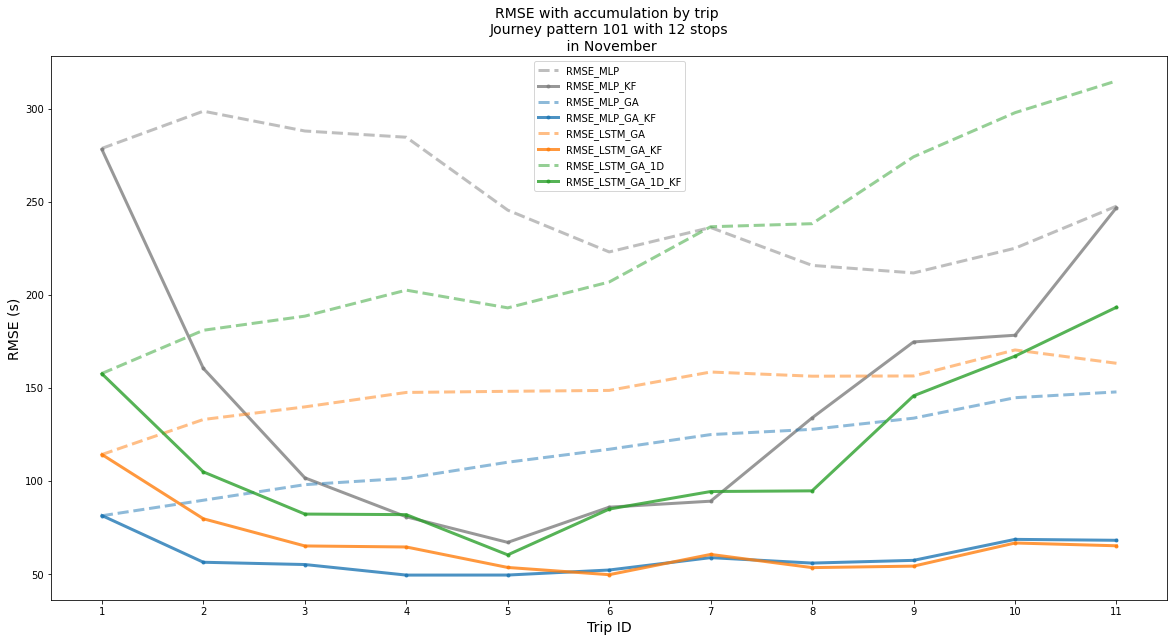

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(comb_result_rmse.index, comb_result_rmse['rmse_MLP_trip'], '--', color = 'tab:gray', label = 'RMSE_MLP',alpha=0.5, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman_trip'],'.-', label = 'RMSE_MLP_KF',color='tab:gray',alpha=0.8, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLPGA_trip'], '--',label = 'RMSE_MLP_GA',color='tab:blue',alpha=0.5, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLPGA_Kalman_trip'], '.-',label = 'RMSE_MLP_GA_KF',color='tab:blue',alpha=0.8, linewidth=3)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTM_trip'], '--',label = 'RMSE_LSTM',color='tab:brown',alpha=0.5, linewidth=3)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTM_Kalman_trip'], '.-',label = 'RMSE_LSTM_KF',color='tab:brown',alpha=0.8, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_trip'], '--', label = 'RMSE_LSTM_GA',color='tab:orange',alpha=0.5, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_Kalman_trip'], '.-',label = 'RMSE_LSTM_GA_KF',color='tab:orange',alpha=0.8, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_1D_trip'], '--',label = 'RMSE_LSTM_GA_1D',color='tab:green',alpha=0.5, linewidth=3)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_1D_Kalman_trip'], '.-',label = 'RMSE_LSTM_GA_1D_KF',color='tab:green',alpha=0.8, linewidth=3)
#'''
plt.xticks(np.arange(len(comb_result_rmse['rmse_MLP_trip'])), np.arange(1, len(comb_result_rmse['rmse_MLP_trip'])+1))

plt.ylabel(r'RMSE (s)', fontsize=14)
plt.xlabel('Trip ID', fontsize=14)

plt.title('RMSE with accumulation by trip \n' +path_name+ '\n in '+ calendar.month_name[month], fontsize = 14)

plt.legend()

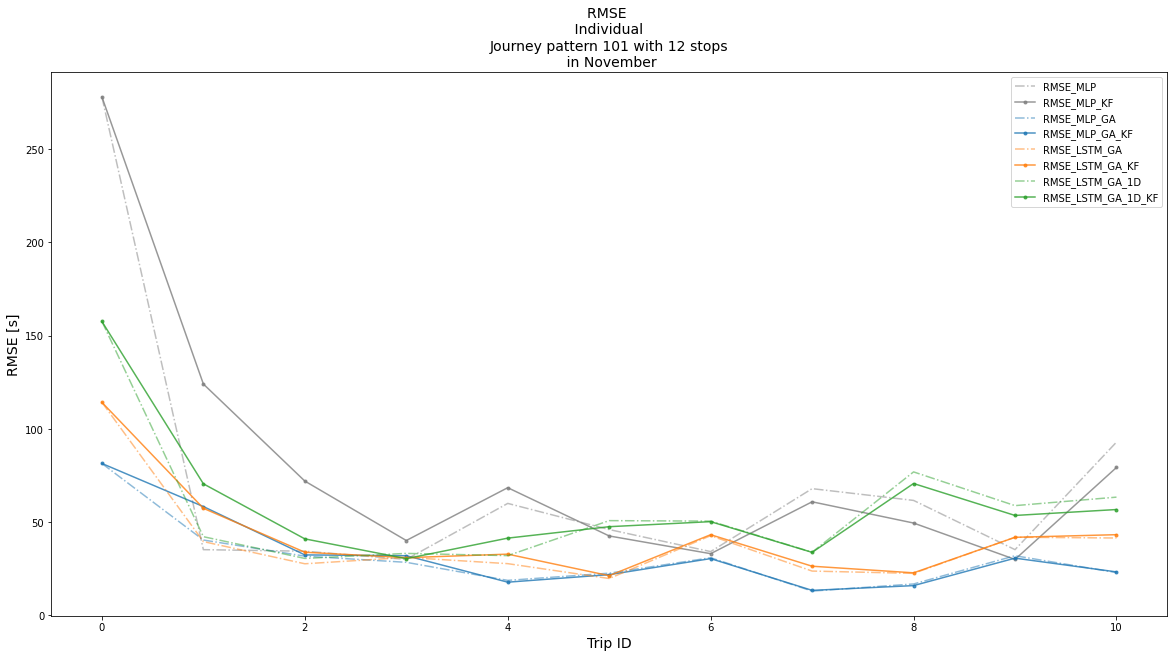

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(comb_result_rmse.index, comb_result_rmse['rmse_MLP'], '-.', color = 'tab:gray', label = 'RMSE_MLP',alpha=0.5)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLP_Kalman'],'.-', label = 'RMSE_MLP_KF',color='tab:gray',alpha=0.8)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTM'], '-.',label = 'RMSE_LSTM',color='tab:brown',alpha=0.5)
#plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTM_Kalman'], '.-',label = 'RMSE_LSTM_KF',color='tab:brown',alpha=0.8)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLPGA'], '-.',label = 'RMSE_MLP_GA',color='tab:blue',alpha=0.5)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_MLPGA_Kalman'], '.-',label = 'RMSE_MLP_GA_KF',color='tab:blue',alpha=0.8)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA'], '-.', label = 'RMSE_LSTM_GA',color='tab:orange',alpha=0.5)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_Kalman'], '.-',label = 'RMSE_LSTM_GA_KF',color='tab:orange',alpha=0.8)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_1D'], '-.',label = 'RMSE_LSTM_GA_1D',color='tab:green',alpha=0.5)
plt.plot(comb_result_rmse.index,comb_result_rmse['rmse_LSTMGA_1D_Kalman'], '.-',label = 'RMSE_LSTM_GA_1D_KF',color='tab:green',alpha=0.8)
#'''
plt.ylabel(r'RMSE [s]', fontsize=14)
plt.xlabel('Trip ID', fontsize=14)

plt.title('RMSE \n Individual \n' +path_name+ '\n in '+ calendar.month_name[month], fontsize = 14)

plt.legend()

# Export data

In [ ]:
#path_file = 'combine_result'+path_end+'.csv'
#comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+".csv")
#comb_result_rmse.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+".csv")

comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
comb_result_rmse.to_csv ("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")
#!cp path_file "/content/drive/My Drive/Colab Notebooks/Thesis"